## Major Project Test

FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommends health insurance to its customers based on their profile once these customers land on the website. 

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install imblearn
from sklearn.metrics import accuracy_score, f1_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [37]:
pwd()

'C:\\Users\\debji\\Downloads\\Decodr Data Science Course\\Major Project Test'

In [38]:
df1 = pd.read_csv('train_dataset.csv')
df1

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [39]:
df2 = pd.read_csv('test_dataset.csv')
df2

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [42]:
df1.isna()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,False,False,False,False,False,False,False,False,False,True,True,False,False,False
50878,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50879,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50880,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df2.isna()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,False,False,False,False,False,False,False,False,False,False,False,False,False
21801,False,False,False,False,False,False,False,False,False,False,False,False,False
21802,False,False,False,False,False,False,False,False,False,True,True,False,False
21803,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
df1.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [45]:
df2.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [46]:
df1 = df1.dropna()

In [47]:
df1.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [48]:
df2 = df2.dropna()

In [49]:
df2.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [50]:
df1.shape

(23548, 14)

In [51]:
df2.shape

(10170, 13)

In [52]:
df1.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [53]:
df1

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50875,50876,C6,231,Rented,Individual,36,36,No,X3,2.0,1.0,20,13574.0,1
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [54]:
# Counting the values
df1['Response'].value_counts()

0    17848
1     5700
Name: Response, dtype: int64

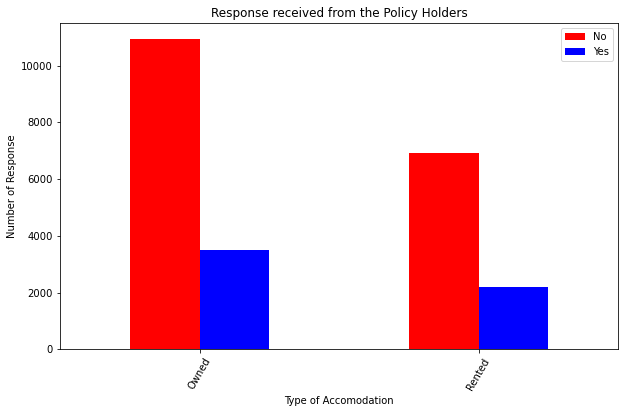

In [85]:
# Create a plot
pd.crosstab(df1.Accomodation_Type, df1.Response).plot(kind="bar", figsize=(10,6), color=["red", "blue"])

plt.title("Response received from the Policy Holders")
plt.xlabel("Type of Accomodation")
plt.ylabel("Number of Response")
plt.legend(["No", "Yes"])
plt.xticks(rotation=60); 

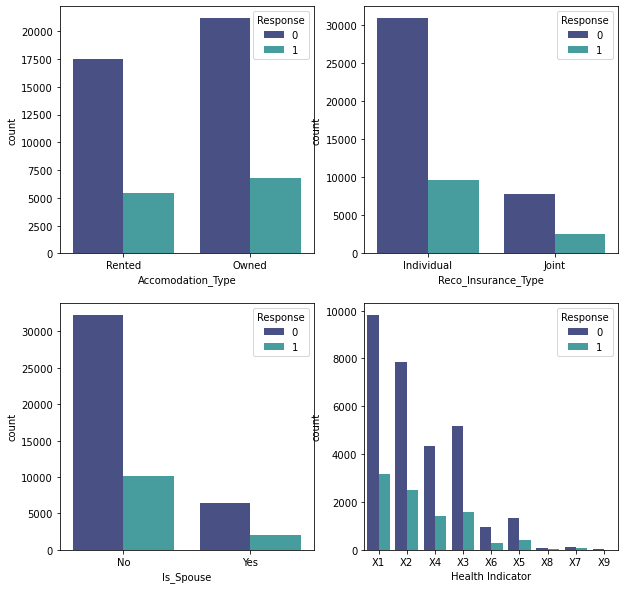

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(ax=axes[0,0],x='Accomodation_Type',hue='Response',data=df,palette="mako") 
sns.countplot(ax=axes[0,1],x='Reco_Insurance_Type',hue='Response',data=df,palette="mako") 
sns.countplot(ax=axes[1,0],x='Is_Spouse',hue='Response',data=df,palette="mako") 
sns.countplot(ax=axes[1,1],x='Health Indicator',hue='Response',data=df,palette="mako");

C:\Users\debji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


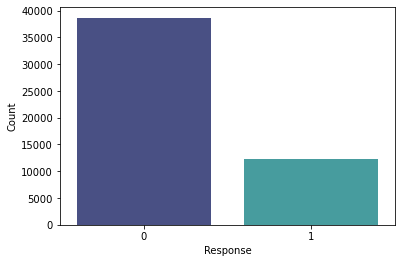

In [69]:
Response = df.loc[:,"Response"].value_counts().rename('Count')
plt.xlabel('Response')
plt.ylabel('Count')
sns.barplot(Response.index , Response.values,palette="mako");

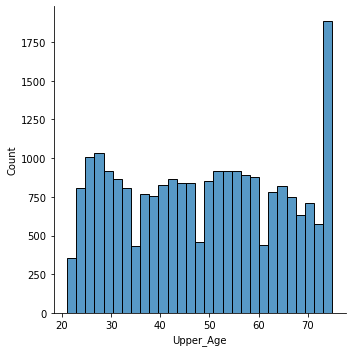

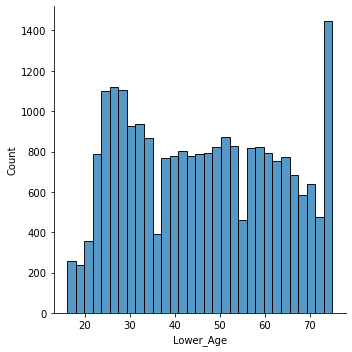

In [75]:
sns.displot(df1['Upper_Age'])
sns.displot(df1['Lower_Age']);

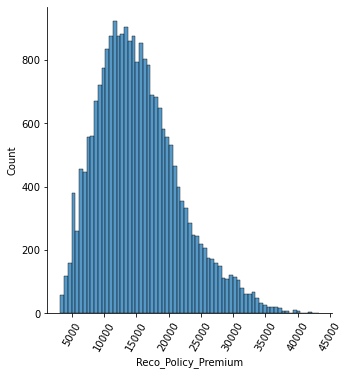

In [78]:
sns.displot(df1['Reco_Policy_Premium'])
plt.xticks(rotation=60);

In [86]:
# Find the correlation between our independent variables
corr_matrix = df1.corr()
corr_matrix

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.004799,-0.007819,-0.004889,0.004841,-0.008977,-0.007925,0.004300
Region_Code,-0.004799,1.000000,-0.007473,-0.005174,0.009845,-0.064802,-0.011561,0.003073
Upper_Age,-0.007819,-0.007473,1.000000,0.896605,0.135353,0.026707,0.749360,-0.004938
Lower_Age,-0.004889,-0.005174,0.896605,1.000000,0.112106,0.023930,0.525896,-0.010051
Holding_Policy_Type,0.004841,0.009845,0.135353,0.112106,1.000000,0.078893,0.115346,0.008874
Reco_Policy_Cat,-0.008977,-0.064802,0.026707,0.023930,0.078893,1.000000,0.063324,0.117186
Reco_Policy_Premium,-0.007925,-0.011561,0.749360,0.525896,0.115346,0.063324,1.000000,0.002648
Response,0.004300,0.003073,-0.004938,-0.010051,0.008874,0.117186,0.002648,1.000000


In [87]:
corr_matrix = df2.corr()
corr_matrix

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
ID,1.000000,0.000046,-0.001561,-0.015139,-0.010417,-0.012801,0.003738
Region_Code,0.000046,1.000000,-0.012443,-0.008107,0.002401,-0.054568,-0.027020
Upper_Age,-0.001561,-0.012443,1.000000,0.895296,0.151020,0.014919,0.743599
Lower_Age,-0.015139,-0.008107,0.895296,1.000000,0.124737,0.008794,0.514140
Holding_Policy_Type,-0.010417,0.002401,0.151020,0.124737,1.000000,0.072353,0.134416
Reco_Policy_Cat,-0.012801,-0.054568,0.014919,0.008794,0.072353,1.000000,0.058894
Reco_Policy_Premium,0.003738,-0.027020,0.743599,0.514140,0.134416,0.058894,1.000000


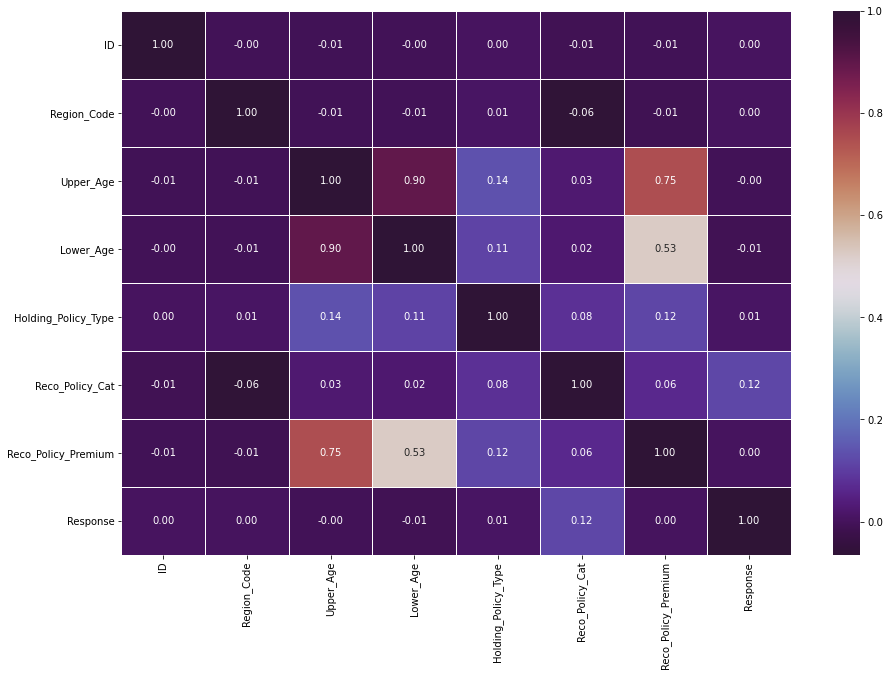

In [89]:
corr_matrix = df1.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="twilight_shifted");

In [92]:
df1

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50875,50876,C6,231,Rented,Individual,36,36,No,X3,2.0,1.0,20,13574.0,1
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [138]:
new_df = df1[['Upper_Age','Lower_Age','Holding_Policy_Type','Reco_Policy_Cat','Reco_Policy_Premium','Reco_Policy_Premium','Response']]
new_df

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Reco_Policy_Premium,Response
0,36,36,3.0,22,11628.0,11628.0,0
3,52,48,3.0,19,17780.0,17780.0,0
4,44,44,1.0,16,10404.0,10404.0,0
5,52,52,1.0,22,15264.0,15264.0,1
7,75,73,4.0,17,29344.0,29344.0,1
...,...,...,...,...,...,...,...
50875,36,36,1.0,20,13574.0,13574.0,1
50878,27,27,3.0,4,5408.0,5408.0,0
50879,63,63,1.0,12,11374.0,11374.0,0
50880,71,49,2.0,16,28179.2,28179.2,1


##### Modeling the data

In [139]:
x = new_df.drop('Response', axis=1)

y = new_df['Response']

In [140]:
x.head()

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Reco_Policy_Premium
0,36,36,3.0,22,11628.0,11628.0
3,52,48,3.0,19,17780.0,17780.0
4,44,44,1.0,16,10404.0,10404.0
5,52,52,1.0,22,15264.0,15264.0
7,75,73,4.0,17,29344.0,29344.0


In [141]:
y

0        0
3        0
4        0
5        1
7        1
        ..
50875    1
50878    0
50879    0
50880    1
50881    0
Name: Response, Length: 23548, dtype: int64

##### Splitting the data into Train & Test

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2) 

In [144]:
x_train

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Reco_Policy_Premium
5,52,52,1.0,22,15264.0,15264.0
18221,28,28,3.0,10,12366.0,12366.0
40046,25,25,4.0,11,11142.0,11142.0
40593,36,36,1.0,4,11728.0,11728.0
37981,28,28,4.0,4,6100.0,6100.0
...,...,...,...,...,...,...
26042,29,29,2.0,22,7680.0,7680.0
46685,51,51,3.0,20,15796.0,15796.0
11790,54,51,3.0,22,28329.6,28329.6
1908,43,21,1.0,19,24264.0,24264.0


In [145]:
y_train, len(y_train)

(5        1
 18221    1
 40046    0
 40593    0
 37981    0
         ..
 26042    0
 46685    0
 11790    0
 1908     0
 34180    1
 Name: Response, Length: 18838, dtype: int64,
 18838)

In [146]:
x_test

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Reco_Policy_Premium
33204,62,62,3.0,1,15904.0,15904.0
18372,68,68,2.0,20,17920.0,17920.0
24139,57,57,1.0,1,14088.0,14088.0
25810,75,75,3.0,11,17920.0,17920.0
7765,61,28,3.0,9,29070.0,29070.0
...,...,...,...,...,...,...
19455,65,65,1.0,11,16272.0,16272.0
1471,29,29,1.0,17,10416.0,10416.0
12900,75,73,4.0,3,27300.0,27300.0
28135,75,62,3.0,19,31878.4,31878.4


In [147]:
y_test, len(y_test)

(33204    0
 18372    0
 24139    0
 25810    0
 7765     0
         ..
 19455    0
 1471     0
 12900    0
 28135    0
 439      1
 Name: Response, Length: 4710, dtype: int64,
 4710)

##### Model choices

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

### Logistic Regression

In [148]:
from sklearn import metrics

In [149]:
# Loading Linear Regression
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fitting the model
LR_model.fit(x_train, y_train)

#predict
LR_predicted_y_test  = LR_model.predict(x_test)

#actual
LR_actual_y_test = y_test

In [150]:
LR_predicted_y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [151]:
LR_actual_y_test

33204    0
18372    0
24139    0
25810    0
7765     0
        ..
19455    0
1471     0
12900    0
28135    0
439      1
Name: Response, Length: 4710, dtype: int64

### K-Nearest Neighbors Classifier

In [152]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [153]:
# Loading K-Nearest Neighbors
KNN_model = KNC(n_neighbors = 3)

# Fitting the model
KNN_model.fit(x_train, y_train)

#predict
KNN_predicted_y_test  = KNN_model.predict(x_test)

#actual
KNN_actual_y_test = y_test

In [154]:
KNN_predicted_y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [155]:
KNN_actual_y_test

33204    0
18372    0
24139    0
25810    0
7765     0
        ..
19455    0
1471     0
12900    0
28135    0
439      1
Name: Response, Length: 4710, dtype: int64

### RandomForest Classification

In [157]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [158]:
#create a model
RF_model = RFC(n_estimators= 250,max_depth= 1)

#model fitting
RF_model.fit(x_train, y_train)

#prediction 
RF_predicted_y_test = RF_model.predict(x_test)

#actual
RF_actual_y_test = y_test

In [159]:
RF_predicted_y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
RF_actual_y_test

33204    0
18372    0
24139    0
25810    0
7765     0
        ..
19455    0
1471     0
12900    0
28135    0
439      1
Name: Response, Length: 4710, dtype: int64

#### Model Comparison

In [165]:
print ( 'Logistic Regression:',LR_model.score(x_train,y_train),
        'K-Nearest Neighbor:',KNN_model.score(x_train,y_train),
        'Random Forest Classifier:',RF_model.score(x_train,y_train),sep="\n")

Logistic Regression:
0.7582545917825672
K-Nearest Neighbor:
0.8169126234207453
Random Forest Classifier:
0.7582545917825672


<Figure size 720x1080 with 0 Axes>

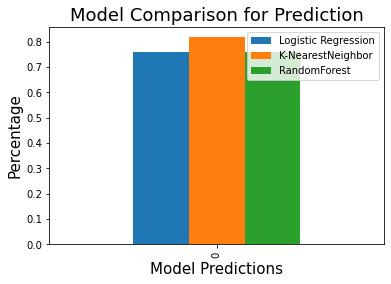

In [167]:
# A model create to visualize the comparisons of the 4 models:

A = (LR_model.score(x_train,y_train),KNN_model.score(x_train, y_train),RF_model.score(x_train,y_train))
B = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
model_scores =(A)
model_compare = pd.DataFrame(model_scores)
plt.figure(figsize=(10,15))
model_compare.T.plot.bar();
plt.xlabel("Model Predictions", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Model Comparison for Prediction", size=18)
plt.legend(["Logistic Regression","K-NearestNeighbor","RandomForest",]);